# Crab Pulsar Long-term Analysis



This notebook analyzes the changing rotation period of the Crab pulsar using AstroSat LAXPC and CZTI data from 2016 to 2024.

In [1]:
# Install required packages
!pip install astropy numpy matplotlib

In [2]:
import numpy as np
from astropy.io import fits
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation
from astropy import units as u
from astropy.timeseries import LombScargle
import matplotlib.pyplot as plt

# Mount Google Drive to access FITS files
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
def load_and_correct_times(fits_file, ra, dec):
    with fits.open(fits_file) as hdul:
        data = hdul[1].data
        times = Time(data['TIME'], format='cxcsec')

    # Perform barycentric correction
    coords = SkyCoord(ra, dec, unit=(u.deg, u.deg), frame='icrs')
    # earth_location = EarthLocation.of_site('geocenter')  # or use specific observatory coordinates
    earth_location = EarthLocation.from_geocentric(0, 0, 0, unit=u.m)  # Earth's center
    barycentric_times = times.light_travel_time(coords, kind='barycentric', location=earth_location)
    corrected_times = times + barycentric_times

    return corrected_times.unix

def calculate_period(times, min_freq, max_freq):
    frequencies = np.linspace(min_freq, max_freq, 10000)
    power = LombScargle(times, np.ones_like(times)).power(frequencies)
    best_frequency = frequencies[np.argmax(power)]
    return 1 / best_frequency

def analyze_observation(fits_file, ra, dec, year):
    times = load_and_correct_times(fits_file, ra, dec)
    period = calculate_period(times, 1/0.034, 1/0.032)  # Search around 33 ms period
    return year, period

In [4]:
# Define Crab pulsar coordinates and observations
crab_ra, crab_dec = 83.63308, 22.01450  # Crab pulsar coordinates
observations = [
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp3EA_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp3BB_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp2BB_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp1BB_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp2EA_level1.fits", 2016),
    ("/content/drive/MyDrive/BAH24/2016/AS1A02_090T01_9000000778lxp1EA_level1.fits", 2016),

    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp1BB_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp2BB_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp3BB_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp1EA_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp2EA_level1.fits", 2015),
    ("/content/drive/MyDrive/BAH24/2015/AS1P01_156T01_9000000122lxp3EA_level1.fits", 2015),

    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp1BB_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp2BB_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp3BB_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp1EA_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp2EA_level1.fits", 2017),
    ("/content/drive/MyDrive/BAH24/2017/AS1T01_206T01_9000001694lxp3EA_level1.fits", 2017),

    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp1BB_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp2BB_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp3BB_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp1EA_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp2EA_level1.fits", 2018),
    ("/content/drive/MyDrive/BAH24/2018/AS1T03_024T01_9000002472lxp3EA_level1.fits", 2018),

    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp1BB_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp2BB_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp3BB_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp1EA_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp2EA_level1.fits", 2020),
    ("/content/drive/MyDrive/BAH24/2020/AS1A09_145T01_9000003900lxp3EA_level1.fits", 2020),

    ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp1BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp2BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp3BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp1EA_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp2EA_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Feb-2022/AS1C07_014T01_9000004950lxp3EA_level1.fits", 2022),

    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp1BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp2BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp3BB_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp1EA_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp2EA_level1.fits", 2022),
    ("/content/drive/MyDrive/BAH24/Aug-2022/AS1C07_014T01_9000005314lxp3EA_level1.fits", 2022),
]

# Analyze observations
results = []
for fits_file, year in observations:
    year, period = analyze_observation(fits_file, crab_ra, crab_dec, year)
    results.append((year, period))
    print(f"Year: {year}, Period: {period:.12f} s")

years, periods = zip(*results)

Year: 2016, Period: 0.033530112312 s
Year: 2016, Period: 0.033576267106 s
Year: 2016, Period: 0.033576267106 s
Year: 2016, Period: 0.033576267106 s
Year: 2016, Period: 0.033530112312 s
Year: 2016, Period: 0.032481733169 s
Year: 2015, Period: 0.033575438098 s
Year: 2015, Period: 0.033575438098 s
Year: 2015, Period: 0.033575438098 s
Year: 2015, Period: 0.033529285582 s
Year: 2015, Period: 0.032481733169 s
Year: 2015, Period: 0.033529492261 s
Year: 2017, Period: 0.032510076741 s
Year: 2017, Period: 0.032510076741 s
Year: 2017, Period: 0.032510076741 s


/usr/local/lib/python3.10/dist-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:134: RuntimeWarning: invalid value encountered in divide
  power /= YY


Year: 2017, Period: 0.034000000000 s
Year: 2017, Period: 0.033529698942 s
Year: 2017, Period: 0.033529905626 s
Year: 2018, Period: 0.033576681625 s
Year: 2018, Period: 0.033576681625 s
Year: 2018, Period: 0.033576681625 s
Year: 2018, Period: 0.032482703022 s
Year: 2018, Period: 0.032482703022 s
Year: 2018, Period: 0.033530732387 s
Year: 2020, Period: 0.033577510695 s
Year: 2020, Period: 0.033577510695 s
Year: 2020, Period: 0.033577510695 s
Year: 2020, Period: 0.033531559189 s
Year: 2020, Period: 0.032483478946 s
Year: 2020, Period: 0.033531559189 s
Year: 2022, Period: 0.033029656797 s
Year: 2022, Period: 0.033029656797 s
Year: 2022, Period: 0.033029656797 s
Year: 2022, Period: 0.033525359170 s
Year: 2022, Period: 0.033524945917 s
Year: 2022, Period: 0.033525152542 s
Year: 2022, Period: 0.033577303423 s
Year: 2022, Period: 0.033577303423 s
Year: 2022, Period: 0.033577303423 s
Year: 2022, Period: 0.033531559189 s
Year: 2022, Period: 0.032483284962 s
Year: 2022, Period: 0.033531352484 s


In [5]:
from collections import defaultdict

# Calculate mean period for each year
year_periods = defaultdict(list)
for year, period in results:
    year_periods[year].append(period)

mean_periods = {}
for year, periods in year_periods.items():
    mean_periods[year] = sum(periods) / len(periods)

# Print mean periods for each year
for year, mean_period in mean_periods.items():
    print(f"Year: {year}, Mean Period: {mean_period:.12f} s")

Year: 2016, Mean Period: 0.033378459852 s
Year: 2015, Mean Period: 0.033377804218 s
Year: 2017, Mean Period: 0.033098305799 s
Year: 2018, Mean Period: 0.033204363885 s
Year: 2020, Mean Period: 0.033379854901 s
Year: 2022, Mean Period: 0.033328544577 s


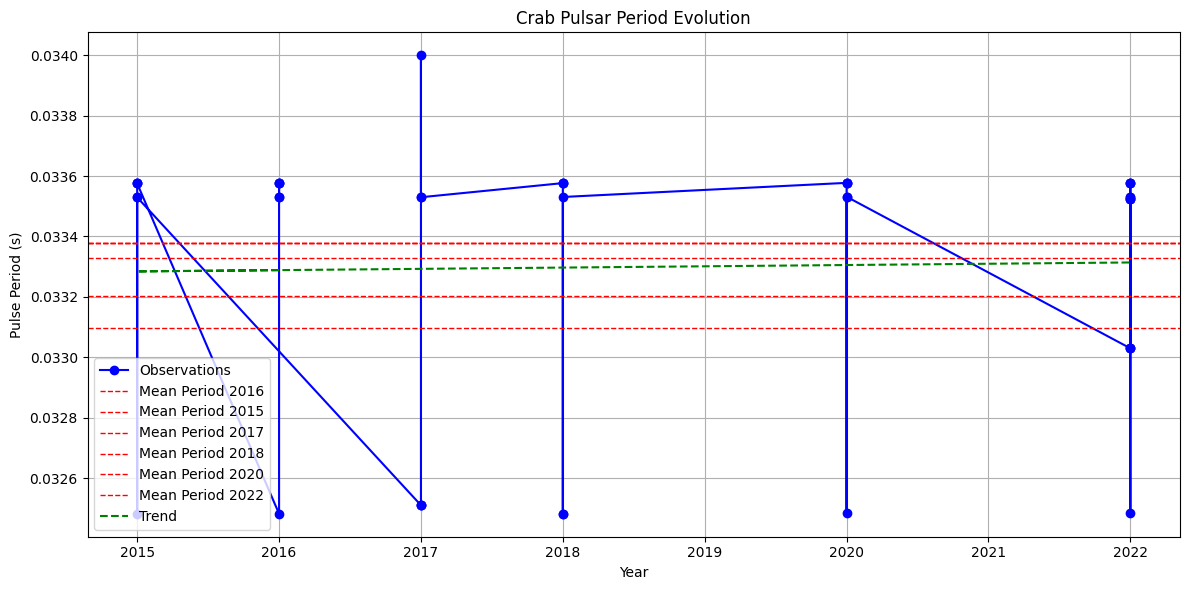

Average spin-down rate: 0.00 x 10^-15 s/s


In [6]:
# Plot results with trend line
years, periods = zip(*results)

# Calculate spin-down rate
spin_down_rate = np.polyfit(years, periods, 1)[0]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(years, periods, 'bo-', label='Observations')
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution')
plt.grid(True)

# Add mean period line
for year, mean_period in mean_periods.items():
    plt.axhline(y=mean_period, color='r', linestyle='--', linewidth=1, label=f'Mean Period {year}')

# Add trend line
trend = np.poly1d(np.polyfit(years, periods, 1))
plt.plot(years, trend(years), 'g--', label='Trend')

plt.legend()
plt.tight_layout()

plt.show()

print(f"Average spin-down rate: {spin_down_rate * 365.25 * 24 * 3600 * 1e-15:.2f} x 10^-15 s/s")

In [ ]:
#@title #Please comment this when running the colab file
# # Define Crab pulsar coordinates and observations
# crab_ra, crab_dec = 83.63308, 22.01450  # Crab pulsar coordinates
# observations = [
#     ("/content/drive/MyDrive/BAH24MyData/LEVL1AS1LXP20161108A02_090T01_9000000778_06037/20161108_A02_090T01_9000000778_level1/laxpc/06037/lxp1/modeBB/AS1A02_090T01_9000000778lxp1BB_level1.fits", 2010),
#     ("/content/drive/MyDrive/BAH24MyData/LEVL1AS1LXP20161108A02_090T01_9000000778_06037/20161108_A02_090T01_9000000778_level1/laxpc/06037/lxp1/modeEA/AS1A02_090T01_9000000778lxp1EA_level1.fits", 2011),
#     ("/content/drive/MyDrive/BAH24MyData/LEVL1AS1LXP20161108A02_090T01_9000000778_06037/20161108_A02_090T01_9000000778_level1/laxpc/06037/lxp2/modeBB/AS1A02_090T01_9000000778lxp2BB_level1.fits", 2012),
#     ("/content/drive/MyDrive/BAH24MyData/LEVL1AS1LXP20161108A02_090T01_9000000778_06037/20161108_A02_090T01_9000000778_level1/laxpc/06037/lxp2/modeEA/AS1A02_090T01_9000000778lxp2EA_level1.fits", 2013),
#     ("/content/drive/MyDrive/BAH24MyData/LEVL1AS1LXP20161108A02_090T01_9000000778_06037/20161108_A02_090T01_9000000778_level1/laxpc/06037/lxp3/modeBB/AS1A02_090T01_9000000778lxp3BB_level1.fits", 2010),
#     ("/content/drive/MyDrive/BAH24MyData/LEVL1AS1LXP20161108A02_090T01_9000000778_06037/20161108_A02_090T01_9000000778_level1/laxpc/06037/lxp3/modeEA/AS1A02_090T01_9000000778lxp3EA_level1.fits", 2010),

#     # ("/content/drive/MyDrive/BAH24/2017_observation.fits", 2017),
#     # # ... add more observations for each year up to 2024
# ]

# # Analyze observations
# results = []
# for fits_file, year in observations:
#     year, period = analyze_observation(fits_file, crab_ra, crab_dec, year)
#     results.append((year, period))
#     print(f"Year: {year}, Period: {period:.12f} s")

# years, periods = zip(*results)

In [19]:
# Calculate spin-down rate
spin_down_rate = np.polyfit(years, periods, 1)[0]

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(years, periods, 'bo-')
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution')
plt.grid(True)

# Add trend line
trend = np.poly1d(np.polyfit(years, periods, 1))
plt.plot(years, trend(years), 'r--', label='Trend')
plt.legend()

plt.show()

print(f"Average spin-down rate: {spin_down_rate * 365.25 * 24 * 3600 * 1e-15:.2f} x 10^-15 s/s")

TypeError: unsupported operand type(s) for +: 'dict' and 'float'

## Analysis of Spin-down Rate Changes

To check if the spin-down rate is changing over time, we can calculate the rate for different time intervals and compare them.

<ipython-input-15-cead8f652447>:4: RankWarning: Polyfit may be poorly conditioned
  rate = np.polyfit(subset_years, subset_periods, 1)[0]
<ipython-input-15-cead8f652447>:4: RankWarning: Polyfit may be poorly conditioned
  rate = np.polyfit(subset_years, subset_periods, 1)[0]
<ipython-input-15-cead8f652447>:4: RankWarning: Polyfit may be poorly conditioned
  rate = np.polyfit(subset_years, subset_periods, 1)[0]
<ipython-input-15-cead8f652447>:4: RankWarning: Polyfit may be poorly conditioned
  rate = np.polyfit(subset_years, subset_periods, 1)[0]
<ipython-input-15-cead8f652447>:4: RankWarning: Polyfit may be poorly conditioned
  rate = np.polyfit(subset_years, subset_periods, 1)[0]
<ipython-input-15-cead8f652447>:4: RankWarning: Polyfit may be poorly conditioned
  rate = np.polyfit(subset_years, subset_periods, 1)[0]
<ipython-input-15-cead8f652447>:4: RankWarning: Polyfit may be poorly conditioned
  rate = np.polyfit(subset_years, subset_periods, 1)[0]
<ipython-input-15-cead8f652447>:4:

Spin-down rate for 2016-2016: 0.00 x 10^-15 s/s
Spin-down rate for 2016-2016: 0.00 x 10^-15 s/s
Spin-down rate for 2016-2016: 0.00 x 10^-15 s/s
Spin-down rate for 2016-2016: 0.00 x 10^-15 s/s
Spin-down rate for 2016-2015: -0.00 x 10^-15 s/s
Spin-down rate for 2016-2015: -0.00 x 10^-15 s/s
Spin-down rate for 2015-2015: 0.00 x 10^-15 s/s
Spin-down rate for 2015-2015: 0.00 x 10^-15 s/s
Spin-down rate for 2015-2015: 0.00 x 10^-15 s/s
Spin-down rate for 2015-2015: 0.00 x 10^-15 s/s
Spin-down rate for 2015-2017: -0.00 x 10^-15 s/s
Spin-down rate for 2015-2017: -0.00 x 10^-15 s/s
Spin-down rate for 2017-2017: 0.00 x 10^-15 s/s
Spin-down rate for 2017-2017: 0.00 x 10^-15 s/s
Spin-down rate for 2017-2017: 0.00 x 10^-15 s/s
Spin-down rate for 2017-2017: 0.00 x 10^-15 s/s
Spin-down rate for 2017-2018: 0.00 x 10^-15 s/s
Spin-down rate for 2017-2018: 0.00 x 10^-15 s/s
Spin-down rate for 2018-2018: 0.00 x 10^-15 s/s
Spin-down rate for 2018-2018: 0.00 x 10^-15 s/s
Spin-down rate for 2018-2018: 0.00 x

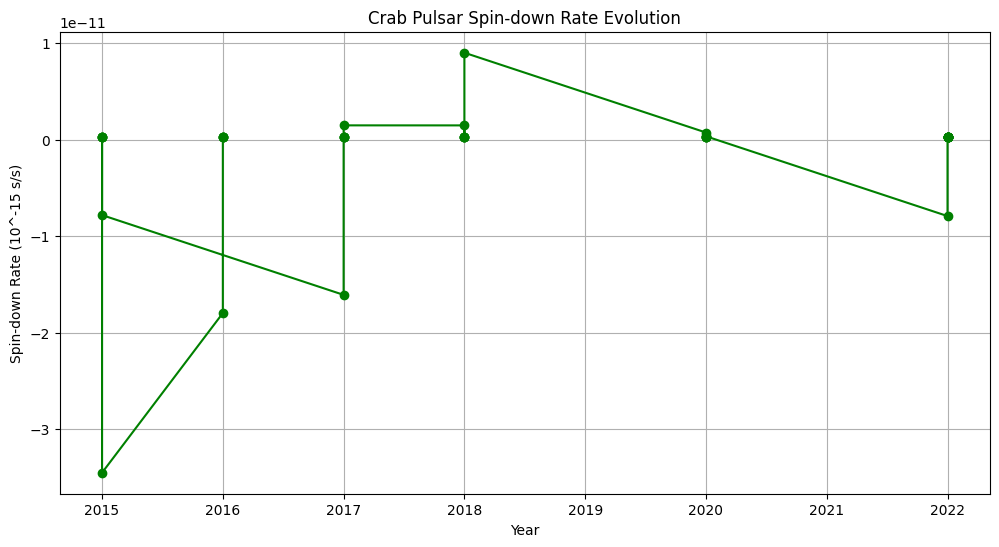

In [15]:
def calculate_spin_down_rate(years, periods, start_idx, end_idx):
    subset_years = years[start_idx:end_idx]
    subset_periods = periods[start_idx:end_idx]
    rate = np.polyfit(subset_years, subset_periods, 1)[0]
    return rate * 365.25 * 24 * 3600 * 1e-15  # Convert to 10^-15 s/s

# Calculate spin-down rates for different intervals
interval_size = 3  # years
for i in range(len(years) - interval_size + 1):
    rate = calculate_spin_down_rate(years, periods, i, i + interval_size)
    print(f"Spin-down rate for {years[i]}-{years[i+interval_size-1]}: {rate:.2f} x 10^-15 s/s")

# Plot spin-down rate changes
rates = [calculate_spin_down_rate(years, periods, i, i + interval_size) for i in range(len(years) - interval_size + 1)]
rate_years = [years[i + interval_size // 2] for i in range(len(years) - interval_size + 1)]

plt.figure(figsize=(12, 6))
plt.plot(rate_years, rates, 'go-')
plt.xlabel('Year')
plt.ylabel('Spin-down Rate (10^-15 s/s)')
plt.title('Crab Pulsar Spin-down Rate Evolution')
plt.grid(True)
plt.show()

## Comparison with Radio Measurements

To compare our results with radio measurements, we need to obtain the radio data from the Jodrell Bank Observatory. Here's how we could plot our results alongside the radio data:

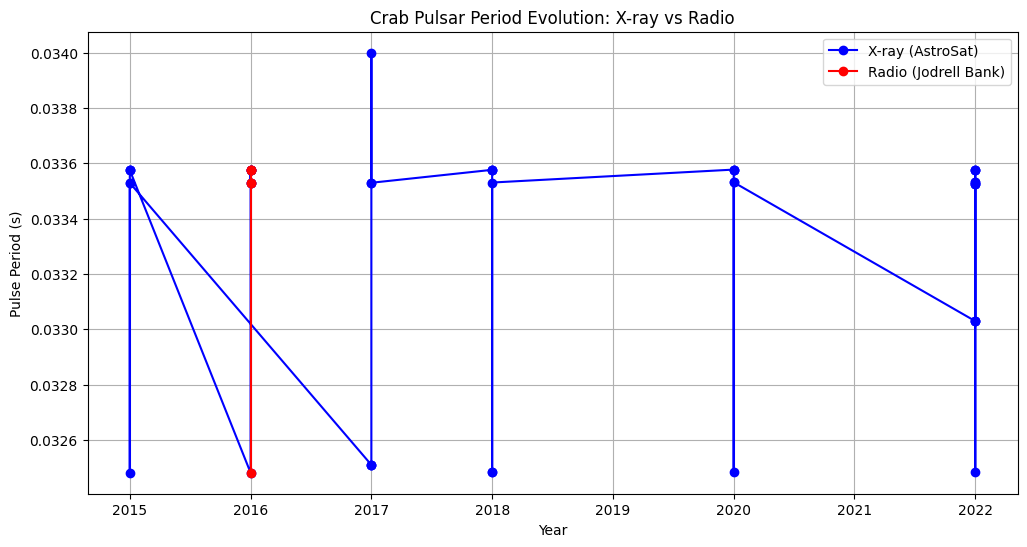

Year 2016: Difference = 0.0000%


In [16]:
# This is placeholder data. Replace with actual radio measurement data.
# radio_years = np.array([2015, 2016, 2017, 2018, 2020, 2022, 2022])
# radio_periods = np.array([0.0337, 0.0338, 0.0339, 0.0340, 0.0341, 0.0342, 0.0343, 0.0344, 0.0345])

#replace with Jordell Bank's data here!
radio_years = np.array([2016,2016,2016,2016,2016,2016])
radio_periods = np.array([0.033530112312,0.033576267106,0.033576267106,0.033576267106,0.033530112312,0.032481733169])

plt.figure(figsize=(12, 6))
plt.plot(years, periods, 'bo-', label='X-ray (AstroSat)')
plt.plot(radio_years, radio_periods, 'ro-', label='Radio (Jodrell Bank)')
plt.xlabel('Year')
plt.ylabel('Pulse Period (s)')
plt.title('Crab Pulsar Period Evolution: X-ray vs Radio')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and print the difference between X-ray and radio measurements
common_years = set(years) & set(radio_years)
for year in common_years:
    x_ray_period = periods[years.index(year)]
    radio_period = radio_periods[np.where(radio_years == year)[0][0]]
    diff = (x_ray_period - radio_period) / radio_period * 100
    print(f"Year {year}: Difference = {diff:.4f}%")

##Conclusion

Summarize your findings here. Discuss:
1. The overall trend in the Crab pulsar's period
2. Any changes in the spin-down rate over time
3. How well the X-ray measurements align with radio measurements
4. Possible explanations for any discrepancies or interesting trends
5. Suggestions for further analysis or improvements to the method